<a href="https://colab.research.google.com/github/sriram0339/notebooks/blob/master/HackCUForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install pulp


     |████████████████████████████████| 39.2MB 101kB/s 


# Data Driven Forecasting

We will explore how models can be built for time series forecasting with applications ranging from financial forecasting to helping people with type-1 diabetes.

We will start with the familiar concept of regression.

## Linear Regression

Regression is (more or less) the task of fitting a curve to data. The most common type of regression is called _least squares_ regression.


Text(0, 0.5, 'y')

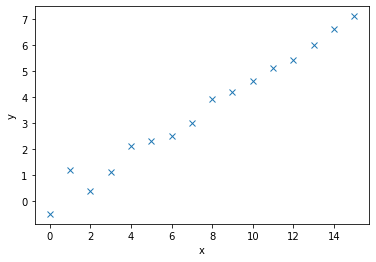

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Here is our data for x and y
x = np.matrix([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 , 13, 14, 15]).T
y = np.matrix([-0.5, 1.2, 0.4, 1.1, 2.1, 2.3, 2.5, 3.0, 3.9, 4.2, 4.6, 5.1, 5.4, 6.0, 6.6, 7.1 ]).T
# plot it
plt.plot(x, y, 'x')
plt.xlabel('x')
plt.ylabel('y')

Best fit line slope: 0.46290322580645155


Text(0, 0.5, 'y')

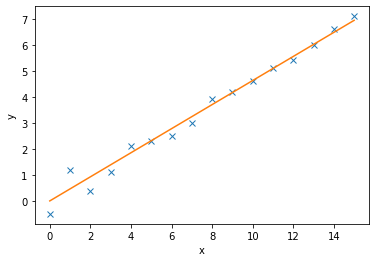

In [3]:
# To find the best fit, solve the least squares problem
# lstsq returns a tuple, just take the first item of the tuple it returns
m = np.linalg.lstsq(x, y, rcond=None)[0] 
# Print the slope
print('Best fit line slope:', m[0,0])
# plot the fit
plt.plot(x, y, 'x')
plt.plot(x, m[0,0] * x )
plt.xlabel('x')
plt.ylabel('y')

Data can often have more than one inputs $(x_1, \ldots, x_n)$.
This is called multilinear regression in statistics.
Here is some data wherein $y$ depends on $\vec{x}: (x_1, x_2, x_3)$.

## Residuals

After we have fit a model to the data, the residual is simply the 
difference between actual $y$ value and that predicted by the model.

$$ r = y - A x$$

In [0]:
# Generate some data on x
x = np.random.normal(size=(10000,3))
# Generate y
y = x*np.matrix([[1],[1.2],[-0.4]]) + np.random.normal(size=(10000,1))

Model: y = 0.980029 * x1 + 1.192999 * x2 + -0.398122 * x3


(array([  1.,   1.,   7.,   5.,  10.,  13.,  30.,  38.,  50.,  86., 106.,
        132., 192., 232., 283., 339., 402., 454., 485., 537., 547., 605.,
        615., 590., 575., 557., 509., 464., 402., 377., 298., 247., 188.,
        164., 138.,  92.,  75.,  48.,  41.,  26.,  14.,  11.,   5.,   2.,
          2.,   1.,   0.,   2.,   1.,   1.]),
 array([-3.48388371, -3.33055771, -3.17723172, -3.02390573, -2.87057973,
        -2.71725374, -2.56392774, -2.41060175, -2.25727575, -2.10394976,
        -1.95062376, -1.79729777, -1.64397177, -1.49064578, -1.33731978,
        -1.18399379, -1.03066779, -0.8773418 , -0.72401581, -0.57068981,
        -0.41736382, -0.26403782, -0.11071183,  0.04261417,  0.19594016,
         0.34926616,  0.50259215,  0.65591815,  0.80924414,  0.96257014,
         1.11589613,  1.26922212,  1.42254812,  1.57587411,  1.72920011,
         1.8825261 ,  2.0358521 ,  2.18917809,  2.34250409,  2.49583008,
         2.64915608,  2.80248207,  2.95580807,  3.10913406,  3.26246006,
 

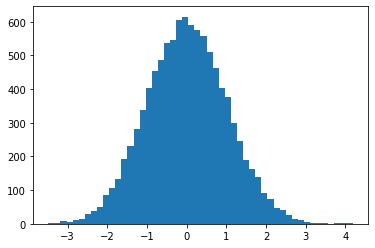

In [5]:
# lstsq returns a tuple, just take the first item of the tuple it returns
m = np.linalg.lstsq(x, y, rcond=None)[0] 
# Print the slope
print('Model: y = %f * x1 + %f * x2 + %f * x3' % (m[0,0], m[1,0], m[2,0]) )
residuals = y - x * m
plt.hist(residuals, bins=50)

## Thinking Nonlinear?

Data does not always have to fit a straight line. Let's generate some data that is not "straight line"

In [0]:
x = np.matrix(np.arange(0, 10, 0.2)).T
m = (x.shape)[0]
y = np.sin(x * 2* 3.1415/10) + 0.6*  np.cos(x * 2 * 3.1415/5) - 0.1 * x + 0.005 * np.square(x) + 0.4 + 0.1 * np.random.normal(size=(m,1))

Text(0, 0.5, 'y')

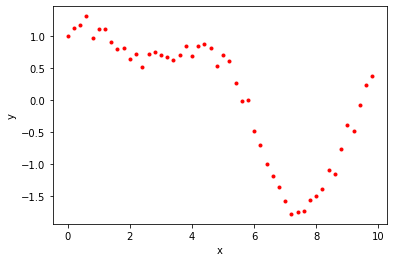

In [7]:
plt.plot(x, y, 'r.')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

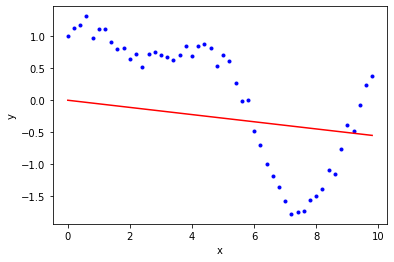

In [8]:
m = np.linalg.lstsq(x, y, rcond=None)[0] 
plt.plot(x, y, 'b.')
plt.plot(x, m[0,0]* x, 'r')
plt.xlabel('x')
plt.ylabel('y')

## Augmenting the Data

$$x = \left[ \begin{array}{c} x(0) \\ x(1) \\ \vdots \\ x(m) \\ \end{array}\right]$$

Instead make a matrix

$$X = \left[ \begin{array}{ccccc}
1 & x(0) & x(0)^2 & \sin(2 \pi x(0)/10) & \cos(2 \pi x(0)/5) \\
1 & x(1) & x(1)^2 & \sin(2 \pi x(1)/10) & \cos(2 \pi x(1)/5) \\
1 & x(2) & x(2)^2 & \sin(2 \pi x(2)/10) & \cos(2 \pi x(2)/5) \\
\vdots &  & & \ddots & \vdots \\
1 & x(m) & x(m)^2 & \sin(2 \pi x(m)/10) & \cos(2 \pi x(m)/5) \\
\end{array}\right] $$



In [0]:
(m,_) = x.shape
# Create the matrix X
X = np.concatenate(
    (
    np.ones(shape=(m,1)),
    x,
    np.square(x),
    np.sin(2*3.1415*x/10.0),
    np.cos(2*3.1415*x/5.0)
    ), 
    axis = 1
)

In [10]:
c = np.linalg.lstsq(X,y,rcond=None)[0]
print('Model: %f + %f * x + %f * x^2 + %f * sin(2 pi x/10) + %f * cos(2 pi x/5)' %(c[0], c[1], c[2], c[3], c[4]))

Model: 0.427821 + -0.115104 * x + 0.006263 * x^2 + 1.025988 * sin(2 pi x/10) + 0.598762 * cos(2 pi x/5)


Text(0, 0.5, 'y')

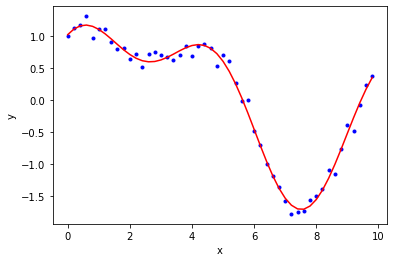

In [11]:
modelPredictions = c[0,0] + c[1,0] * x + c[2,0]*np.square(x) + c[3,0] *(np.sin(2*3.1415*x/10)) + c[4,0] * np.cos(2 * 3.1415*x/5)
plt.plot(x, y, 'b.')
plt.plot(x,modelPredictions , 'r')
plt.xlabel('x')
plt.ylabel('y')

(array([1.47115727, 1.47115727, 0.98077151, 3.43270029, 3.92308604,
        6.37501482, 2.45192878, 1.96154302, 1.96154302, 0.49038576]),
 array([-0.20192463, -0.16114041, -0.12035619, -0.07957198, -0.03878776,
         0.00199646,  0.04278068,  0.0835649 ,  0.12434912,  0.16513334,
         0.20591756]),
 <a list of 10 Patch objects>)

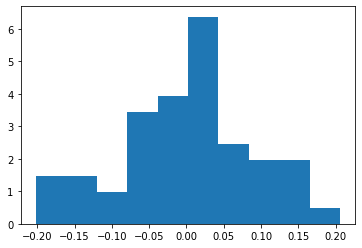

In [12]:
residuals = y - modelPredictions
plt.hist(residuals, bins=10, density=True)

In [0]:
# OPEN A CSV FILE WITH DATA
# REMEMBER TO UPLOAD THE FILE
f = open('euro-usd-data.csv')
ts = []
rates = []
for line in f:
    lineEntries = line.split(',')
    ts.append([float(lineEntries[0])])
    rates.append([float(lineEntries[1])])
f.close()

t0 = np.matrix(ts)
r0 = np.matrix(rates)

times = t0[0:55, :]
rates = r0[0:55, :]

# Hold back 5 months of data
predTimes = t0[54:60, :]
predRatesGroundTruth = r0[54:60,:]



Text(0, 0.5, 'Euro vs. USD conversion rate')

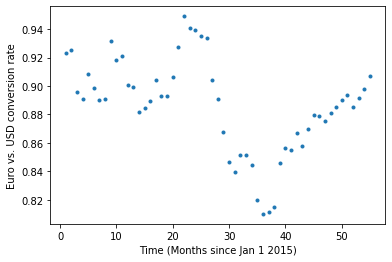

In [161]:
plt.plot(times, rates,'.')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

In [0]:
m = times.shape[0]
pi = 3.1415
X = np.concatenate(  (np.ones((m,1)), times, np.square(times), np.power(times, 3)),  axis = 1 )
for i in range(3,60):
    X = np.concatenate((X, np.sin(2*pi*times/i), np.cos(2*pi*times/i)), axis = 1)


In [192]:
mdl = np.linalg.lstsq(X, rates, rcond=None)[0]
print(mdl)

[[ 1.53648565e+05]
 [-6.66444221e+04]
 [ 2.64086369e+03]
 [-2.39649971e+01]
 [ 5.96236004e-04]
 [ 7.57867929e-04]
 [ 2.82816957e-03]
 [-9.85504537e-04]
 [ 7.50010976e-03]
 [ 4.02773589e-03]
 [-2.06685219e-01]
 [-7.75422593e-02]
 [-8.25642428e-01]
 [-6.05462895e+00]
 [-1.30093403e+01]
 [-1.25494363e+02]
 [-1.16661811e+03]
 [-1.18138137e+03]
 [-1.24592943e+04]
 [ 4.96200437e+03]
 [ 2.15125373e+04]
 [ 6.10287133e+04]
 [ 1.48005521e+05]
 [-9.47526184e+04]
 [-1.88659964e+05]
 [-1.18383438e+05]
 [ 2.38347203e+03]
 [ 1.68603136e+04]
 [-1.12790940e+05]
 [ 1.10263117e+05]
 [-5.52583346e+04]
 [-1.11795946e+03]
 [ 6.48457548e+04]
 [ 4.08383632e+04]
 [ 4.38353940e+04]
 [ 1.07574400e+05]
 [-1.38875021e+04]
 [ 7.25541822e+04]
 [-7.57783754e+03]
 [-1.41817303e+03]
 [ 4.26154956e+04]
 [-3.43761433e+04]
 [ 7.99984761e+04]
 [-1.76939253e+04]
 [ 7.93845764e+04]
 [ 1.51346874e+04]
 [ 5.04323968e+04]
 [ 3.39207332e+04]
 [ 1.51518122e+04]
 [ 2.91126901e+04]
 [-9.68006258e+03]
 [ 7.21651609e+03]
 [-1.7952314

Text(0, 0.5, 'Euro vs. USD conversion rate')

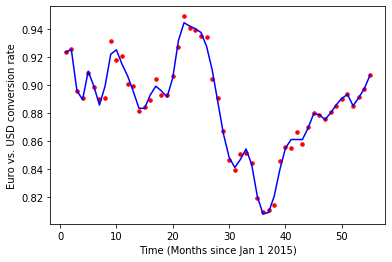

In [193]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*mdl,'b')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

(array([ 11.95413501,   0.        ,  47.81654005,  59.77067506,
         23.90827002, 119.54135012, 191.2661602 ,  71.72481007,
         59.77067506,  11.95413501,  47.81654005,  11.95413501]),
 array([-0.00952013, -0.00799917, -0.0064782 , -0.00495724, -0.00343627,
        -0.00191531, -0.00039434,  0.00112662,  0.00264759,  0.00416855,
         0.00568952,  0.00721048,  0.00873145]),
 <a list of 12 Patch objects>)

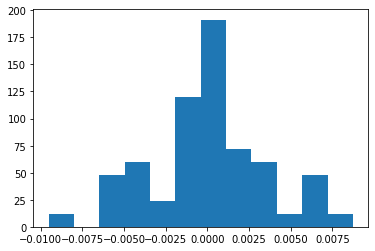

In [194]:
residuals = X * mdl - rates
plt.hist(residuals, bins=12, density=True)

In [195]:
newTimes = predTimes
newM = np.shape(newTimes)[0]
newX = np.concatenate(  (np.ones((newM,1)), newTimes, np.square(newTimes), np.power(newTimes, 3)), axis = 1 )
for i in range(3,60):
    newX = np.concatenate((newX, np.sin(2*pi*newTimes/i), np.cos(2*pi*newTimes/i)), axis = 1)

predRatesL2 = newX * mdl
print(predRatesL2)

[[9.07174050e-01]
 [4.44571901e+00]
 [3.77510037e+01]
 [2.13086566e+02]
 [8.83381005e+02]
 [2.94334840e+03]]


Text(0, 0.5, 'Euro vs. USD conversion rate')

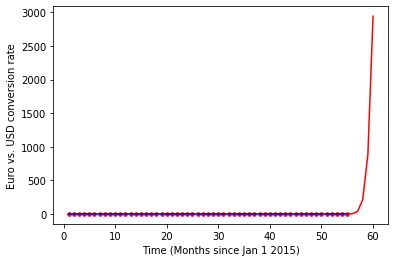

In [196]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*mdl,'b')
plt.plot(newTimes, predRatesL2,'r')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

## Norms

L1, L2, Lp and Linfty norms

L2 norm: 2.692582, L1 norm: 5.500000, L3 norm: 2.232373, Linfty norm: 2.000000


Text(0, 0.5, 'L_p norm')

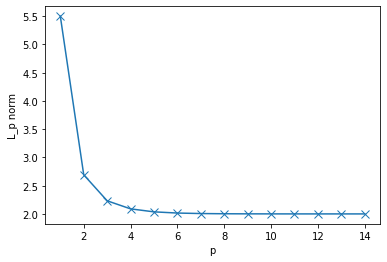

In [197]:
x = np.array([1, 2, 1, 0, -0.5, 1])
v2 = np.linalg.norm(x, ord=2)
v1 = np.linalg.norm(x, ord=1)
v3 = np.linalg.norm(x, ord=3.0)
vinf = np.linalg.norm(x, ord=float('inf'))
print('L2 norm: %f, L1 norm: %f, L3 norm: %f, Linfty norm: %f' % (v2, v1, v3, vinf))
ords = list(range(1, 15))
norms = [np.linalg.norm(x, ord=j) for j in ords] 
plt.plot(ords, norms, '-x', markerSize=8)
plt.xlabel('p')
plt.ylabel('L_p norm')


# Regularized Least Squares

In [0]:
import pulp

def solveL1NormLeastSquares(A, b):
    (m,n) = np.shape(A)
    assert(np.shape(b) == (m,1))
    problem = pulp.LpProblem('L1LeastSquares',pulp.LpMinimize)
    xVars = pulp.LpVariable.dicts("x", range(n))
    tVars = pulp.LpVariable.dicts("t", range(m), 0)
    regVars = pulp.LpVariable.dicts("r", range(n), 0)
    problem += pulp.lpSum([ tVars[i] for i in range(m) ]) + pulp.lpSum([regVars[i] for i in range(n)]), "Sum of all the t and regvariables"
    for i in range(m):
        problem += pulp.lpSum([ A[i,j] * xVars[j] for j in range(n)]) <= b[i,0] + tVars[i] ## Sum_j A(i,j) x(j) <= b(i) + t(i)
        problem += pulp.lpSum([ A[i,j] * xVars[j] for j in range(n) ]) >= b[i,0] -tVars[i] ## Sum_j A(i,j) x(j) >= b(i) - t(i)
    for j in range(n):
        problem += (xVars[j] <= regVars[j])
        problem += (xVars[j] >= -regVars[j])
    problem.solve()
    # Each of the variables is printed with it's resolved optimum value
    for v in problem.variables():
        print(v.name, "=", v.varValue)
    xList = [ xVars[i].varValue for i in range(n) ]
    x = np.matrix(xList).reshape((n,1))
    res = A * x - b
    return (x, res)

In [199]:
(l1mdl, res) = solveL1NormLeastSquares(X, rates)

r_0 = 0.73168853
r_1 = 0.035949513
r_10 = 0.0018923922
r_100 = 0.0
r_101 = 0.0
r_102 = 0.0
r_103 = 0.0
r_104 = 0.0
r_105 = 0.0
r_106 = 0.0
r_107 = 0.0
r_108 = 0.0
r_109 = 0.0
r_11 = 0.0034826809
r_110 = 0.0
r_111 = 0.0
r_112 = 0.0
r_113 = 0.0
r_114 = 0.0
r_115 = 0.0
r_116 = 0.0
r_117 = 0.0
r_12 = 0.00034194694
r_13 = 0.0
r_14 = 0.0073121385
r_15 = 0.0059602753
r_16 = 0.0
r_17 = 0.0
r_18 = 0.0
r_19 = 0.0
r_2 = 0.0016290175
r_20 = 0.0
r_21 = 0.011643065
r_22 = 0.0
r_23 = 0.0038182128
r_24 = 0.0
r_25 = 0.009088277
r_26 = 0.0
r_27 = 0.0018739382
r_28 = 0.0
r_29 = 0.0
r_3 = 1.9245267e-05
r_30 = 0.0
r_31 = 0.0
r_32 = 0.0
r_33 = 0.0
r_34 = 0.0
r_35 = 0.0
r_36 = 0.0
r_37 = 0.0
r_38 = 0.0
r_39 = 0.0
r_4 = 0.0018702332
r_40 = 0.0
r_41 = 0.0
r_42 = 0.0
r_43 = 0.0
r_44 = 0.0
r_45 = 0.017016837
r_46 = 0.0
r_47 = 0.034400613
r_48 = 0.0
r_49 = 0.0
r_5 = 9.7399308e-05
r_50 = 0.0
r_51 = 0.0
r_52 = 0.0
r_53 = 0.0
r_54 = 0.0
r_55 = 0.0
r_56 = 0.0
r_57 = 0.0
r_58 = 0.0
r_59 = 0.0
r_6 = 0.0055394628
r_60 =

Text(0, 0.5, 'Euro vs. USD conversion rate')

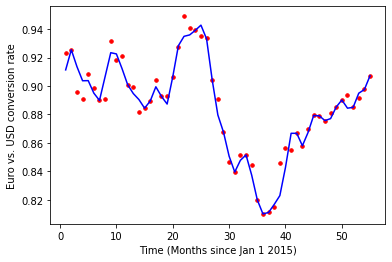

In [200]:
plt.plot(times, rates,'r.',markerSize=7)
plt.plot(times, X*l1mdl,'b')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')

Text(0.5, 1.0, 'L2 norm residuals')

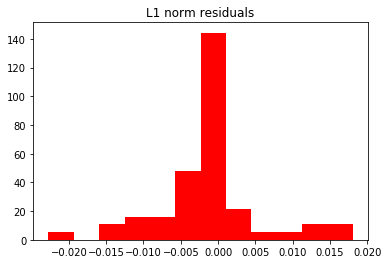

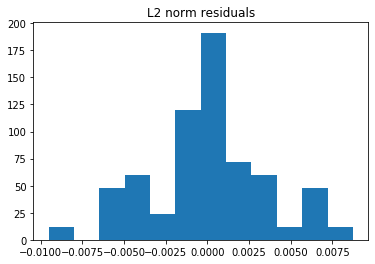

In [201]:
l1residuals = X * l1mdl - rates
plt.hist(l1residuals, bins=12, density=True, color='red')
plt.title('L1 norm residuals')
plt.figure(2)
plt.hist(residuals, bins=12, density=True)
plt.title('L2 norm residuals')


In [202]:
newPredsL1 = newX * l1mdl
print(newPredsL1)

[[0.90719877]
 [0.93944539]
 [0.96974538]
 [0.98565124]
 [1.00668781]
 [1.04858758]]


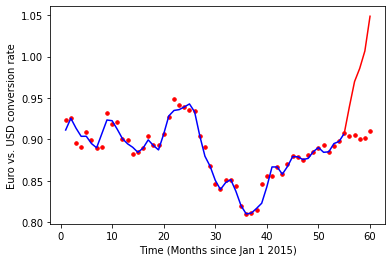

In [205]:
plt.plot(t0, r0,'r.',markerSize=7)
plt.plot(times, X*l1mdl,'b')
plt.plot(newTimes, newPredsL1,'r')
plt.xlabel('Time (Months since Jan 1 2015)')
plt.ylabel('Euro vs. USD conversion rate')
plt.savefig('euro-csv-data-nonlin-l1-plot.png')


In [208]:
from google.colab import files
files.download('euro-csv-data-nonlin-l1-plot.png')

MessageError: ignored